# 018 Linear Algebra BUG HUNT

In [15]:
import numpy as np
import sympy as sym 
from IPython.display import display, Math
import matplotlib.pyplot as plt

In [16]:
# 1.)
# create a column vector
cv = np.array([ [-2], [3] ])

display(Math(sym.latex(sym.sympify(cv))))

<IPython.core.display.Math object>

[-1.4  1.4]


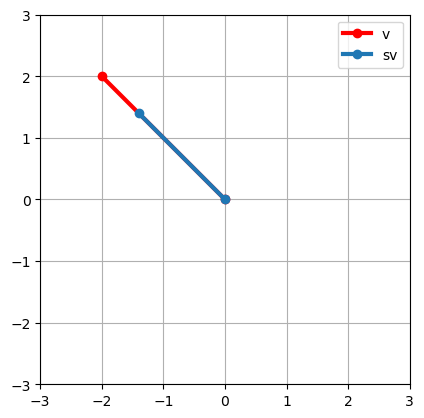

In [26]:
# 2.)
# visualize scalar-vector multiplication

v = np.array([-2,2])
s = .7

sv = s*v
print(sv)
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=3,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='sv')
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [18]:
# 3.)
# algorithm to compute the dot product
v = np.random.randn(7)
w = np.random.randn(7)

dp1 = 0
for i in range(0,len(v)):
    dp1 += v[i]*w[i]

dp2 = np.dot(v,w)

print(str(dp1) + '\t' + str(dp2))

-8.27144080442601	-8.27144080442601


In [19]:
# 4.)
# number of data points
n = 10

# data
data1 = np.arange(0,n) + np.random.randn(n)
data2 = np.arange(0,n) + np.random.randn(n)

# mean-center
data1 -= np.mean(data1)
data2 -= np.mean(data2)

# compute correlation
numer = np.dot(data1,data2)
denom = np.sqrt( np.dot(data1,data1) ) * np.sqrt(np.dot(data2,data2))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(data1,data2)[1][0]

print(r1)
print(r2)

0.9654792401352736
0.9654792401352736


In [20]:
# 5.)
# outer product computation
o1 = np.random.randint(0,10,7)
o2 = np.random.randint(0,10,4)

outermat = np.zeros((len(o1),len(o2)))

for i in range(len(o1)):
    outermat[i,:] = o1[i]*o2
    
print(outermat-np.outer(o1,o2))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [21]:
# 6.)
# matrix multiplication
A = np.random.randn(5,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[ 0.63154569 -0.32709323  0.39966079 -0.10502813  0.1442518 ]
 [-0.04144455 -0.48641588 -0.88801799  0.49752694 -0.06988559]
 [-0.12588336  2.18235056  0.61713144 -0.04966766 -0.07862194]
 [-0.22753447  2.02156467 -0.02118954  0.21827128  0.05260977]
 [ 1.83535081 -1.28169907  1.85117307 -1.36527878 -1.37139574]]
 
[[ 0.63154569 -0.32709323  0.39966079 -0.10502813  0.1442518 ]
 [-0.04144455 -0.48641588 -0.88801799  0.49752694 -0.06988559]
 [-0.12588336  2.18235056  0.61713144 -0.04966766 -0.07862194]
 [-0.22753447  2.02156467 -0.02118954  0.21827128  0.05260977]
 [ 1.83535081 -1.28169907  1.85117307 -1.36527878 -1.37139574]]


In [22]:
# 7.)
# matrix multiplication
A = np.random.randn(8,5)
I = np.eye(8)

I@A

array([[ 1.26895739, -0.15677155, -0.27774096,  0.14664553, -1.75271481],
       [ 1.00811376, -0.20533166, -1.45111109,  0.44293175,  0.23387597],
       [ 0.69949852, -0.96100023, -0.35661512,  0.29170033, -1.13913013],
       [-0.1321449 ,  0.98213647,  0.05059013,  1.27649175, -0.58347593],
       [ 0.28922375, -0.0545735 , -0.5870024 ,  0.04904877,  1.9804121 ],
       [ 1.56619716, -1.39028233, -2.61785095, -0.14104658,  0.12674141],
       [ 0.89137442, -0.13564388, -0.21820105, -0.12358615, -0.06115791],
       [ 0.62943801,  1.13438304,  1.23809828,  1.24893849, -2.11145651]])

In [23]:
# 8.)
# random matrices are invertible
A = np.random.randint(-5,6,(5,5))
Ainv = np.linalg.inv(A)

np.round(A@Ainv,4)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

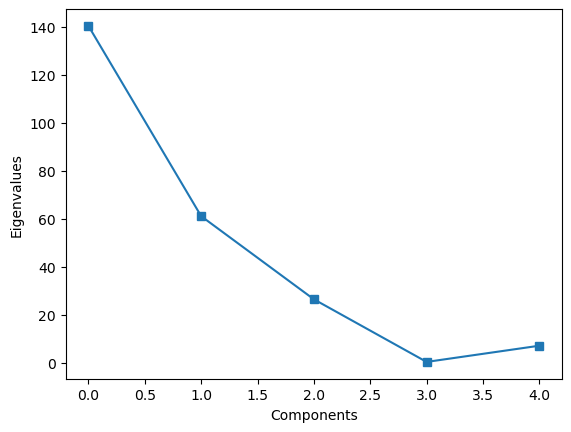

In [24]:
# 9.)
# plot the eigenspectrum
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)

plt.plot(np.matrix.flatten(eigvals),'s-')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')

plt.show()


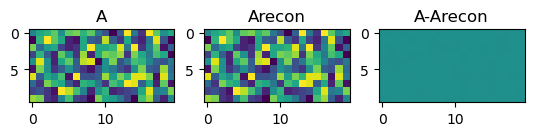

In [25]:
# 10.)
# Reconstruct a matrix based on its SVD
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)

# reconstruct S
# S = np.diag(s)
S = np.zeros(np.shape(A))
for i in range(len(s)):
    S[i,i] = s[i]

Arecon = U@S@V

fig,ax = plt.subplots(1,3)

ax[0].imshow(A,vmin=-10,vmax=10)
ax[0].set_title('A')

ax[1].imshow(Arecon,vmin=-10,vmax=10)
ax[1].set_title('Arecon')

ax[2].imshow(A-Arecon,vmin=-10,vmax=10)
ax[2].set_title('A-Arecon')

plt.show()